<a href="https://colab.research.google.com/github/raj-vijay/mv/blob/master/04_Lab_3_Machine_Vision_Girl_and_Tour_Eiffel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
# Download the images using wget (Linux)
!wget https://raw.githubusercontent.com/raj-vijay/mv/master/images/Girl_in_front_of_a_green_background.jpg
!wget https://raw.githubusercontent.com/raj-vijay/mv/master/images/Tour_Eiffel.jpg

--2020-02-27 17:06:25--  https://raw.githubusercontent.com/raj-vijay/mv/master/images/Girl_in_front_of_a_green_background.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258747 (253K) [image/jpeg]
Saving to: ‘Girl_in_front_of_a_green_background.jpg’

Girl_in_front_of_a_ 100%[===================>] 252.68K  --.-KB/s    in 0.05s   

2020-02-27 17:06:25 (4.69 MB/s) - ‘Girl_in_front_of_a_green_background.jpg’ saved [258747/258747]

--2020-02-27 17:06:26--  https://raw.githubusercontent.com/raj-vijay/mv/master/images/Tour_Eiffel.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sen

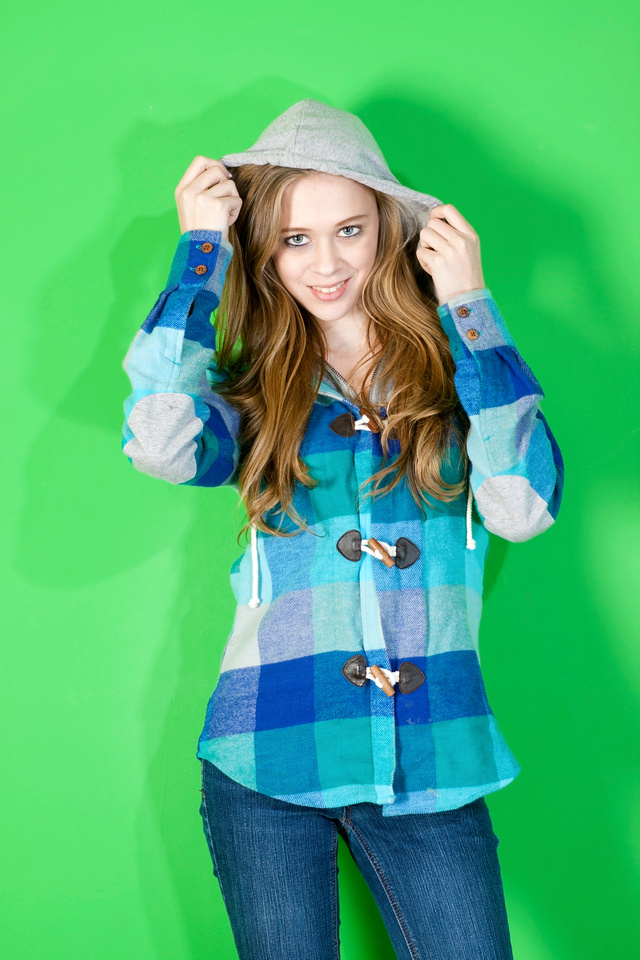

In [3]:
input_img = cv2.imread("Girl_in_front_of_a_green_background.jpg")    
cv2_imshow(input_img)    
hsv_image = cv2.cvtColor(input_img, cv2.COLOR_RGB2HSV)

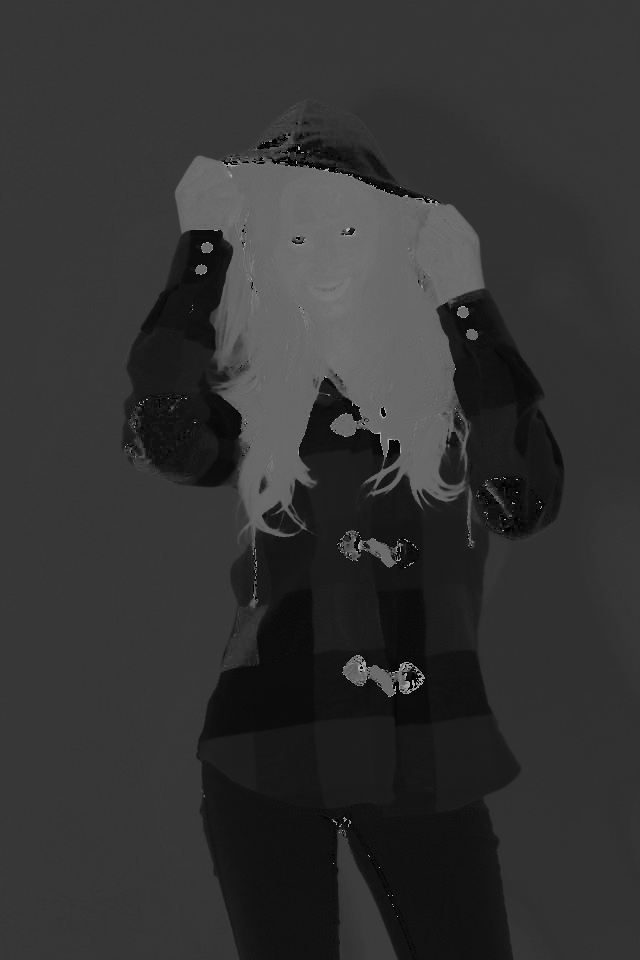

In [4]:
hue_image = hsv_image[:,:,0]
cv2_imshow(hue_image)

<BarContainer object of 256 artists>

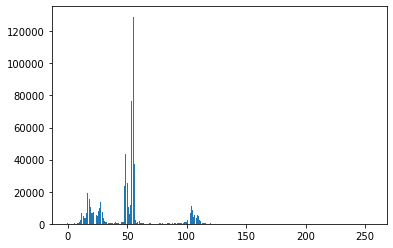

In [6]:
hist = cv2.calcHist([hue_image],[0],None,[256],[0,256])
plt.figure()
plt.bar(range(len(hist)),hist.flatten())

In [0]:
green_peak = np.argmax(hist[40:70])+40
green_peak_width = 20
T = 255*np.ones(256,dtype=np.uint8)        
T[green_peak-green_peak_width:green_peak+green_peak_width]=0

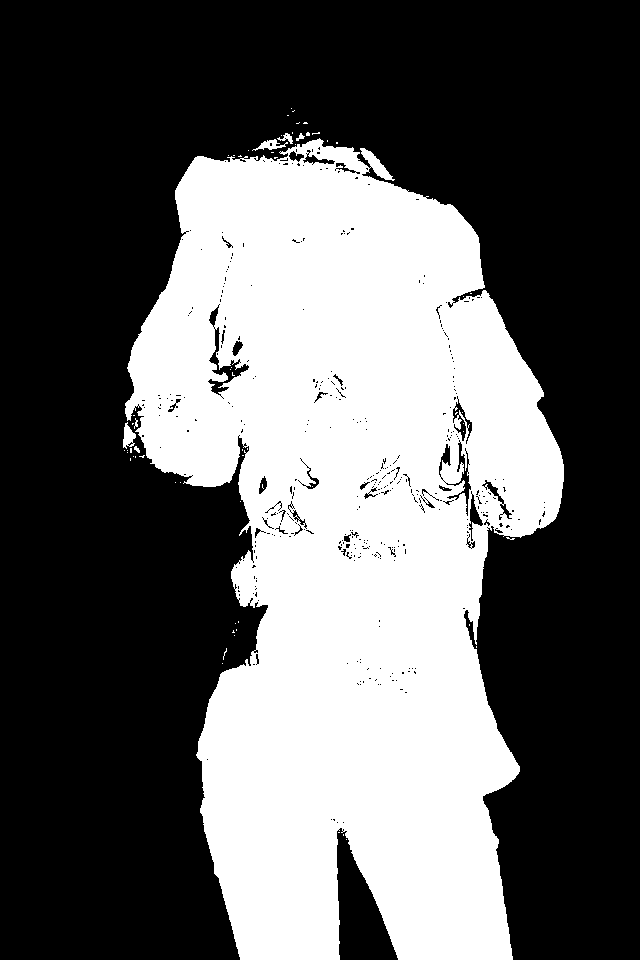

In [26]:
mask = T[hue_image]
cv2_imshow(mask)

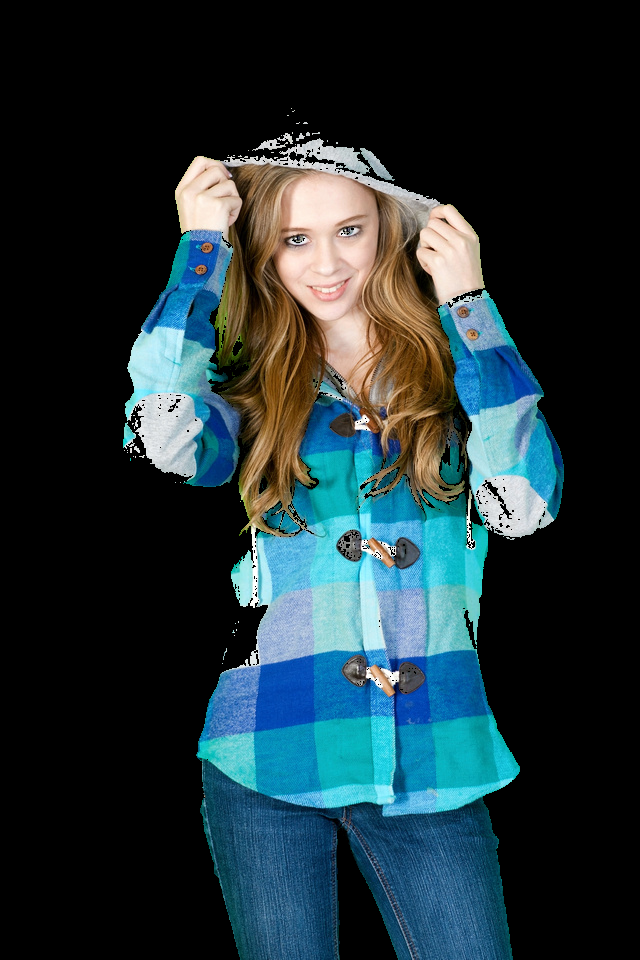

In [10]:
cutout = cv2.bitwise_and(input_img, input_img, mask=mask)
cv2_imshow(cutout)    

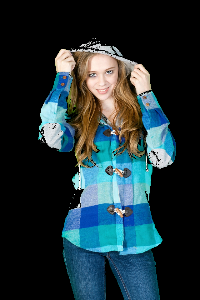

In [11]:
height = 300
width = int(height*input_img.shape[1]/input_img.shape[0])    
cutout_resized = cv2.resize(cutout, (width, height))
cv2_imshow(cutout_resized)   

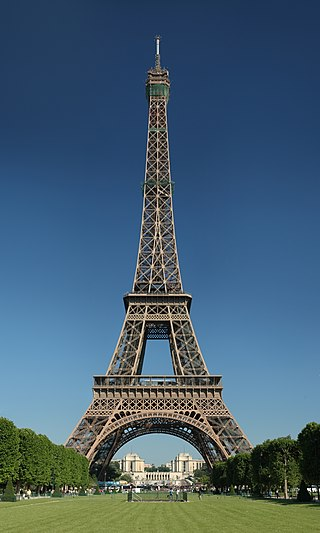

In [12]:
target = cv2.imread("Tour_Eiffel.jpg")
cv2_imshow(target)  

In [0]:
for i in range(cutout_resized.shape[0]):
  for j in range(cutout_resized.shape[1]):
    if cutout_resized[i,j,0]>0:                
      target[target.shape[0]-height+i,int((target.shape[1]-width)/2)+j,:] = cutout_resized[i,j,:]

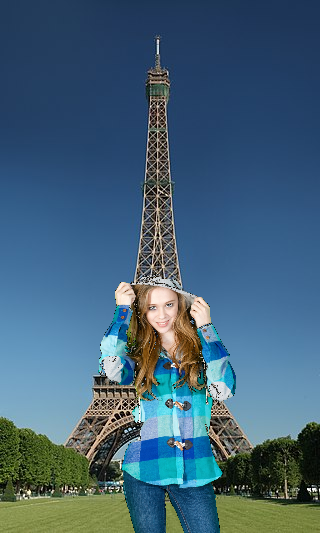

In [14]:
cv2_imshow(target)